# Graduate Rotational Internship Program

<h1><font color='green'>The Sparks Foundation</font></h1>


<h3><span align='center'>Data Science & Business Analytics </span>
<span><font color='red'>Tasks-2 ( CLUSTER ANALYSIS )</font></span></h3>

<h2><font color='blue'> Prediction using Unsupervised ML</font></h2>

<div style="text-align: right"><h2> Srishti Bhandarkar </h2></div>

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
#iris dataset
data='Iris.csv'
df=pd.read_csv(data)

In [3]:
#1st 10 rows
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# Correlation

corr_df = df.corr()
corr_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


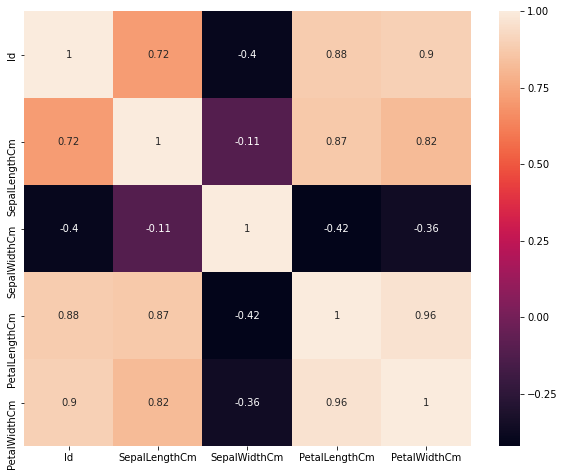

In [7]:
# Heat Map

plt.rcParams['figure.figsize'] = [10, 8]
sns.heatmap(corr_df,annot= True )

In [8]:
# Count of flowers in each unique species
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

### Split the Dataset

In [9]:
X = df.iloc[:, [1,2,3,4]]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## K-MEAN CLUSTERING

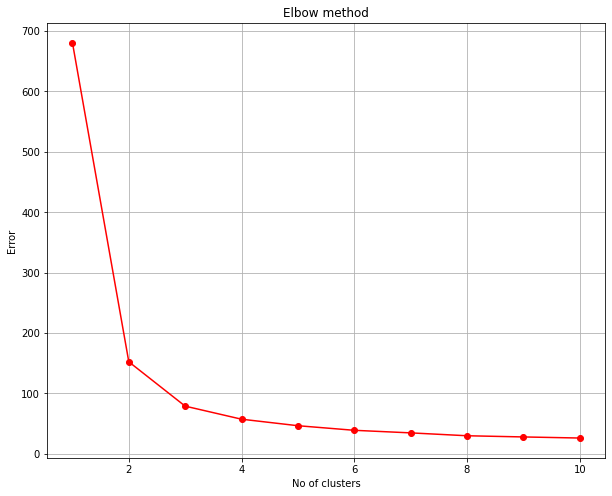

In [10]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error, marker='o', color='r')
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.grid()
plt.show()

In [11]:
print(kmeans.cluster_centers_)

[[5.         2.3        3.275      1.025     ]
 [6.02777778 2.73333333 5.02777778 1.79444444]
 [5.07647059 3.44705882 1.52352941 0.28823529]
 [7.475      3.125      6.3        2.05      ]
 [5.63846154 2.89230769 4.33846154 1.4       ]
 [6.56818182 3.08636364 5.53636364 2.16363636]
 [4.69       3.085      1.385      0.19      ]
 [5.66153846 2.56153846 3.87692308 1.16923077]
 [5.4        3.89230769 1.50769231 0.26923077]
 [6.47777778 2.91666667 4.6        1.42222222]]


In [12]:
len(df['SepalLengthCm'].unique())

35

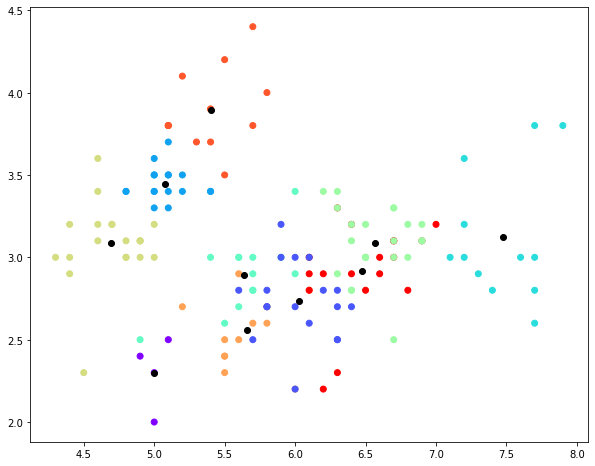

In [13]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=kmeans.labels_ , cmap='rainbow')

plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

In [14]:
kmeans.cluster_centers_[:,1]

array([2.3       , 2.73333333, 3.44705882, 3.125     , 2.89230769,
       3.08636364, 3.085     , 2.56153846, 3.89230769, 2.91666667])

In [15]:
#PREDICTION
Kmean=kmeans.fit_predict(X)
Kmean

array([1, 5, 5, 5, 1, 9, 5, 1, 5, 5, 1, 1, 5, 5, 9, 9, 9, 1, 9, 1, 1, 1,
       5, 1, 1, 5, 1, 1, 1, 5, 5, 1, 9, 9, 5, 5, 1, 5, 5, 1, 1, 5, 5, 1,
       1, 5, 1, 5, 1, 1, 6, 6, 6, 0, 6, 3, 6, 8, 6, 0, 8, 3, 0, 3, 0, 6,
       3, 0, 3, 0, 4, 3, 4, 3, 6, 6, 6, 6, 3, 0, 0, 0, 0, 4, 3, 3, 6, 3,
       0, 0, 0, 3, 0, 8, 0, 3, 3, 3, 8, 0, 2, 4, 7, 2, 2, 7, 0, 7, 2, 7,
       2, 4, 2, 4, 4, 2, 2, 7, 7, 4, 2, 4, 7, 4, 2, 7, 4, 4, 2, 7, 7, 7,
       2, 4, 4, 7, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4])

In [16]:
X[Kmean == 0]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
53,5.5,2.3,4.0,1.3
59,5.2,2.7,3.9,1.4
62,6.0,2.2,4.0,1.0
64,5.6,2.9,3.6,1.3
67,5.8,2.7,4.1,1.0
69,5.6,2.5,3.9,1.1
79,5.7,2.6,3.5,1.0
80,5.5,2.4,3.8,1.1
81,5.5,2.4,3.7,1.0
82,5.8,2.7,3.9,1.2


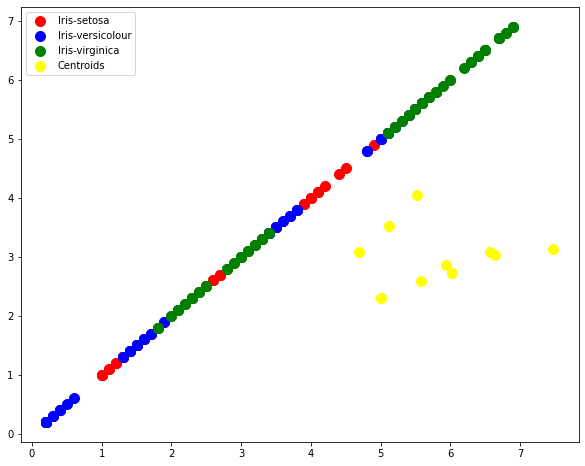

In [17]:
# Visualising the clusters - On the first two columns
plt.scatter(X[Kmean== 0], X[Kmean == 0], s = 100, c = 'red', label = 'Iris-setosa')

plt.scatter(X[Kmean == 1], X[Kmean == 1], s = 100, c = 'blue', label = 'Iris-versicolour')

plt.scatter(X[Kmean == 2], X[Kmean == 2], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()